# Testing coordinate-free operator expressions

In [1]:
import numpy as np
import pylab as plt
# plt.rcParams.update({"text.usetex": True})

In [2]:
def inner(u, v):
    return u.T @ METRIC @ v

def outer(u, v):
    return np.outer(u, v) @ METRIC

def norm(v):
    return np.sqrt(np.abs(inner(v, v)))

def cosine(u, v):
    return inner(u, v) / norm(u) / norm(v)

In [3]:
# start with O(2)
d = 2
METRIC = np.eye(d)
ex = np.array([1., 0.])
ey = np.array([0., 1.])
vv = np.array([4.0, 2.2])
vvprime = np.array([4.6, 1.])
costheta = cosine(vv, vvprime)
sintheta = np.sqrt(1. - costheta ** 2)
print(costheta, sintheta)

0.9585913042625193 0.2847853777711949


In [4]:
def plot_arrow(v, name):
    plt.plot([0, v[0]], [0, v[1]], "k-")
    plt.text(1.15*v[0], 1.15*v[1], name, ha="center", va="center")

In [5]:
def plot_circle():
    thetas = np.linspace(0., 2. * np.pi, 1001)
    plt.plot(np.cos(thetas), np.sin(thetas), "k-", lw=1., alpha=0.25)

def plot_hyperbolae():
    thetas = np.linspace(-5., 5., 1001)
    plt.plot(np.cosh(thetas), np.sinh(thetas), "k-", lw=1., alpha=0.25)
    plt.plot(-np.cosh(thetas), np.sinh(thetas), "k-", lw=1., alpha=0.25)
    plt.plot(np.sinh(thetas), np.cosh(thetas), "k-", lw=1., alpha=0.25)
    plt.plot(np.sinh(thetas), -np.cosh(thetas), "k-", lw=1., alpha=0.25)

In [6]:
def plot_vectors(vlist, namelist):
    plt.figure(figsize=(4,4))
    axiskwargs = {"color": "k", "lw": 1., "alpha": 0.25}
    plt.axvline(0, **axiskwargs)
    plt.axhline(0, **axiskwargs)
    for v, name in zip(vlist, namelist):
        plot_arrow(v, name)
    if np.allclose(METRIC, np.eye(2)):
        plot_circle()
    else:
        plot_hyperbolae()
    plt.gca().set_aspect("equal")
    a = 1.25 * np.max([np.sqrt(v.T @ v) for v in vlist])
    plt.xlim(-a, a)
    plt.ylim(-a, a)
    return None

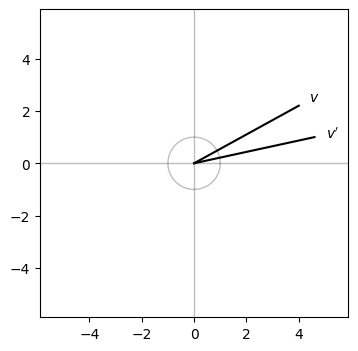

In [7]:
plot_vectors((vv, vvprime), (r"$v$", r"$v'$"))

In [8]:
def orthogonalize(v1, v2):
    # specialized to n=2 vectors in d=2
    u1 = 1. * v1
    u2 = 1. * v2 - (inner(v2, u1) / inner(u1, u1)) * u1
    return u1, u2

def orthonormalize(v1, v2):
    u1, u2 = orthogonalize(v1, v2)
    return u1 / norm(u1), u2 / norm(u2)

In [9]:
uhat1, uhat2 = orthonormalize(vv, ey)
uhatprime1, uhatprime2 = orthonormalize(vvprime, ey)

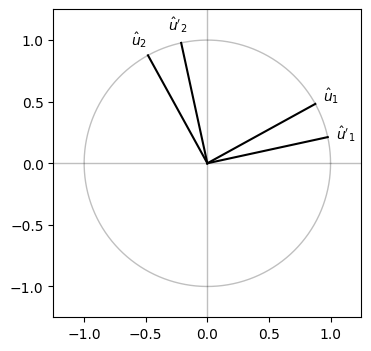

In [10]:
plot_vectors((uhat1, uhat2, uhatprime1, uhatprime2),
             (r"$\hat{u}_1$", r"$\hat{u}_2$", r"$\hat{u}'_1$", r"$\hat{u}'_2$"))

In [11]:
def rotation_matrix(u, v):
    assert inner(u, u) * inner(v, v) > 0. # both timelike or both spacelike
    uhat1, uhat2 = orthonormalize(u, -1. * v)
    uhatprime1, uhatprime2 = orthonormalize(v, u)
    return (outer(uhatprime1, uhat1) / inner(uhat1, uhat1) +
            outer(uhatprime2, uhat2) / inner(uhat2, uhat2))

def rotation_matrix_better(u, v):
    assert inner(u, u) * inner(v, v) > 0. # both timelike or both spacelike
    uhat, vhat = u / norm(u), v / norm(v)
    return (outer(vhat, uhat) - outer(uhat, vhat) + inner(uhat, vhat) * np.eye(2)) / inner(uhat, uhat)

def identity_worse(u, v):
    assert inner(u, u) * inner(v, v) > 0. # both timelike or both spacelike
    uhat, vhat = u / norm(u), v / norm(v)
    return ((outer(uhat, uhat) + outer(vhat, vhat)) / inner(uhat, uhat)
            - inner(uhat, vhat) * (outer(uhat, vhat) + outer(vhat, uhat))) \
    / (1. - inner(uhat, vhat) ** 2)

In [12]:
Q = rotation_matrix(vv, vvprime)
Qbetter = rotation_matrix_better(vv, vvprime)
Qtraditional = np.array([[costheta, sintheta], [-sintheta, costheta]])
print(Q)
print(Qbetter)
print(np.allclose(Q, Qtraditional))
print(np.allclose(Q, Qbetter))
print(np.allclose(Q.T @ METRIC @ Q, METRIC))

[[ 0.9585913   0.28478538]
 [-0.28478538  0.9585913 ]]
[[ 0.9585913   0.28478538]
 [-0.28478538  0.9585913 ]]
True
True
True
[[ 1.00000000e+00 -1.36890987e-15]
 [-1.36890987e-15  1.00000000e+00]]


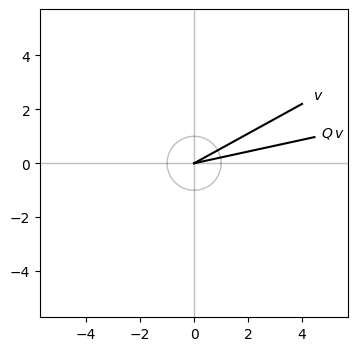

In [13]:
plot_vectors((vv, Q @ vv), (r"$v$", r"$Q\,v$"))

In [14]:
# now let's try O(1,1)
METRIC = np.diag([1., -1.])
ex = np.array([1., 0.])
et = np.array([0., 1.])

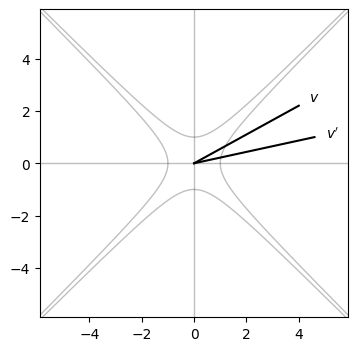

In [15]:
plot_vectors((vv, vvprime), (r"$v$", r"$v'$"))

In [16]:
uhat1, uhat2 = orthonormalize(vv, ex)
uhatprime1, uhatprime2 = orthonormalize(vvprime, ex)

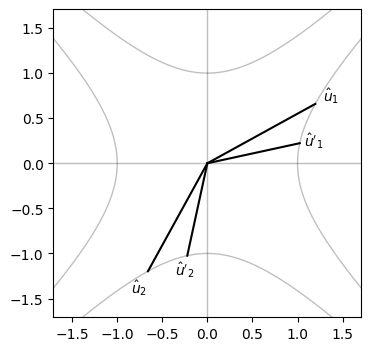

In [17]:
plot_vectors((uhat1, uhat2, uhatprime1, uhatprime2),
             (r"$\hat{u}_1$", r"$\hat{u}_2$", r"$\hat{u}'_1$", r"$\hat{u}'_2$"))

In [18]:
Q = rotation_matrix(vv, vvprime)
Qbetter = rotation_matrix_better(vv, vvprime)
print(Q)
print(np.allclose(Q, Qbetter))
print(np.allclose(Q.T @ METRIC @ Q, METRIC))
print(np.allclose(Qbetter.T @ METRIC @ Qbetter, METRIC))

[[ 1.08003456 -0.40801306]
 [-0.40801306  1.08003456]]
True
True
True


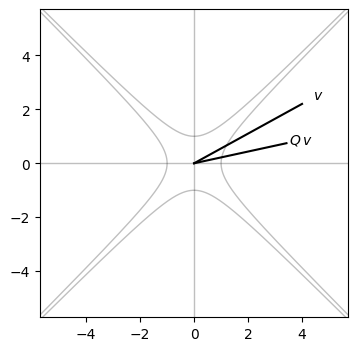

In [19]:
plot_vectors((vv, Q @ vv), (r"$v$", r"$Q\,v$"))

In [25]:
# now do industrial tests
rng = np.random.default_rng(17)
ntrial = 2 ** 10
for METRIC in [np.eye(2), np.diag([1., -1.])]:
    if np.allclose(METRIC, np.eye(2)):
        title = "Euclidean"
    else:
        title = "Lorentz"
    npass = 0
    for trial in range(ntrial):
        while True:
            uu, vv = rng.normal(size=2), rng.normal(size=2)
            if inner(uu, uu) * inner(vv, vv) > 0.:
                break
        Q = rotation_matrix(uu, vv)
        Qbetter = rotation_matrix_better(uu, vv)
        Iworse = identity_worse(uu, vv)
        s, ld = np.linalg.slogdet(Iworse)
        if (np.allclose(Q, Qbetter)
            and np.allclose(Q.T @ METRIC @ Q, METRIC)
            and np.allclose(Iworse, np.eye(2))
            and np.allclose(ld, 0.)):
            npass += 1
    print("testing " + title + " operators: passed", npass, "/", ntrial,
          f"({np.round(100*npass/ntrial)} percent)")

Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclidean 1.0
Euclid